# Mushroom Classification : Is mushroom edible or poisonous ?
- ตัว dataset เป็นข้อมูลที่รวบรวมลักษณะทางกายภาพของเห็ด
- bar blot แสดงความสัมพันธ์ของ label edible, poisonous กับ features บางอัน
- อัลกอริทึมที่ใช้ในการทำ classification model มี 6 ตัวด้วยกัน คือ logistic regression  ,svm, decision tree , random forest, Knn, naive bayes
- จัดการกับ features ที่เหลือด้วย dimensional reduction ให้เหลือเพียง 3 มิติ กับ ไม่ทำเลย 
- มี missing value มากกว่า 2,000 ตัว ใน dataset ดังนั้นใน report นี้จะจัดการกับตัว missing value ด้วย 2 วิธีดังต่อไป คือ

    1.ตัด features stak-root ที่มี missing values ทิ้ง
    
    2.เอา features stalk-root ที่ไม่มี missing value มาแบ่ง test train set แล้ว train model จากนั้น นำ model ที่ได้มาทำนายค่า missing value 


ลำดับสิ่งที่ทำคือ 

1.ตัด feature stak-root ที่มี missing value , ทำ dimensional reduction

2.ตัด feature stak-root ที่มี missing value , ไม่ทำ dimensional reduction

3.ทำการเติม missing value ใน feature stak-root ด้วยการใช้ predict model , ทำ dimensional reduction

4.ทำการเติม missing value ใน feature stak-root ด้วยการใช้ predict model , ไม่ทำ dimensional reduction

# Importing Libraries


In [0]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import requests
from PIL import Image 
import io

In [0]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Edible_Fungi.jpg/1185px-Edible_Fungi.jpg'
r=requests.get(url)
url1 = 'https://infovisual.info/storage/app/media/01/img_en/024%20Mushroom.jpg'
r1=requests.get(url1)

# เห็ดชนิดต่างๆ

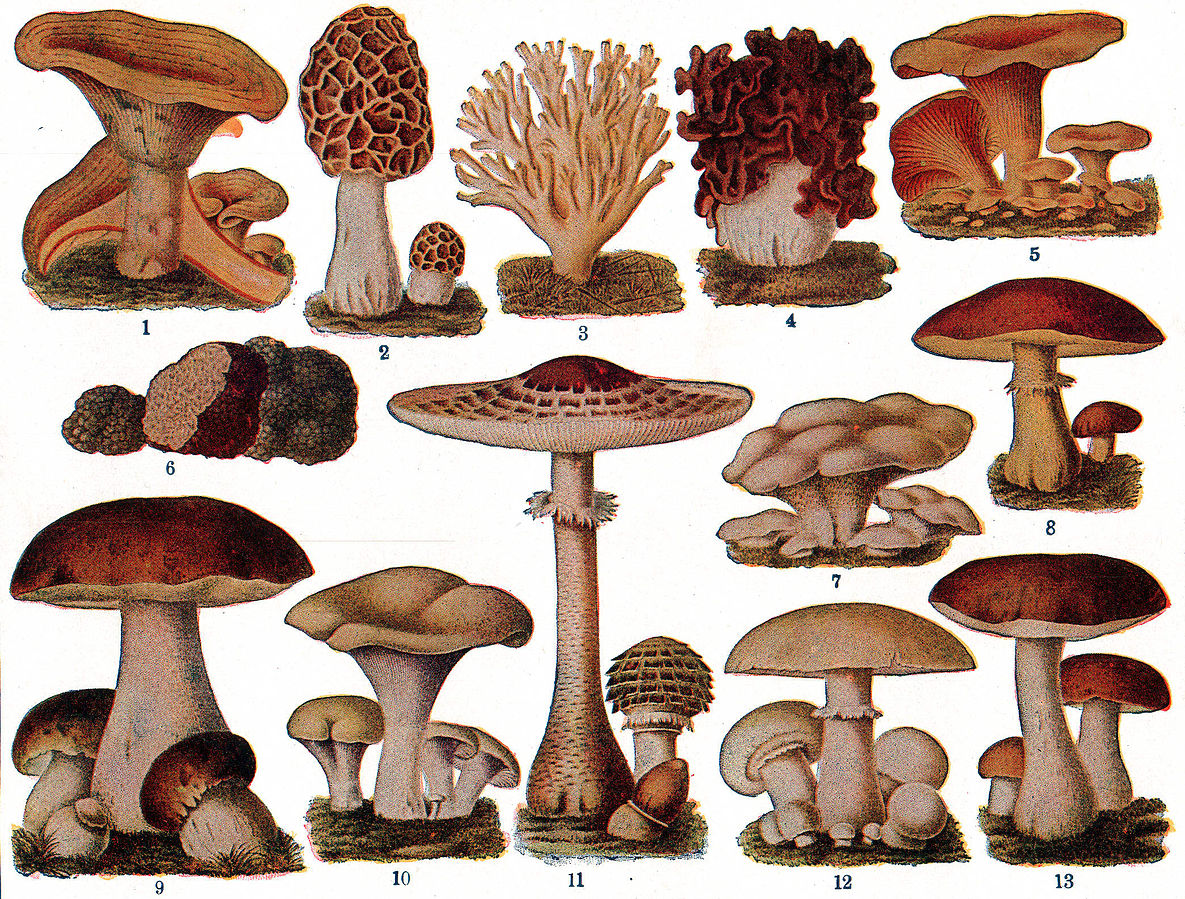

In [0]:
img = Image.open(io.BytesIO(r.content))
img

# ภาพตัวอย่างลักษณะข้อมูลทางกายภาพของเห็ดที่เก็บ

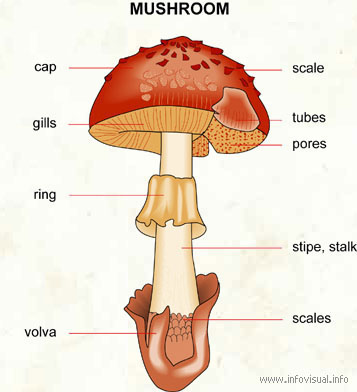

In [0]:
img = Image.open(io.BytesIO(r1.content))
img

# Importing Datasets

In [0]:
df = pd.read_csv(r"C:\Users\User\Desktop\mushroom\mushrooms.csv")

# Label class -> p คือ poisonous(เป็นพิษ) ส่วน e คือ edible(กินได้)

In [0]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Missing value

In [0]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [0]:
#df.isnull().sum()

In [0]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [0]:
from sklearn.preprocessing import LabelEncoder
#Encoder_X = LabelEncoder() 
#for col in X.columns:
    #X[col] = Encoder_X.fit_transform(X[col])
#Encoder_y=LabelEncoder()
#y = Encoder_y.fit_transform(y)

In [0]:
#X.head()

# List of column name 

In [0]:
#a=[i for i in X.columns]
#a

# calculate amount of each bar represent in bar plot function

In [0]:
def autolabel(rects,fontsize=16):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

In [0]:
#habitat_labels

In [0]:
#var_labels

In [0]:
#ind  colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']

# Bar plots : class แสดงจำนวนเห็ดที่กินได้และเห็ดมีพิษ

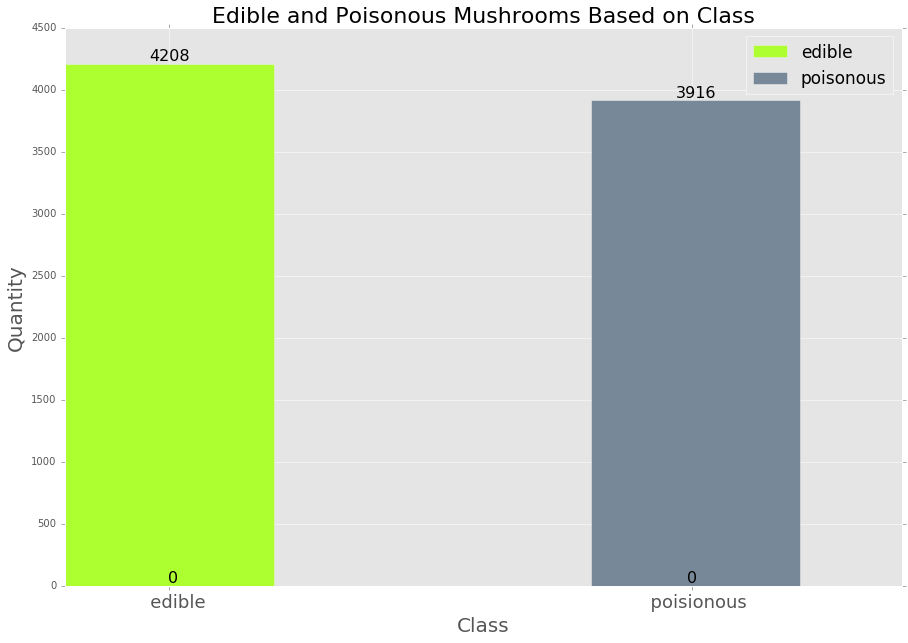

In [0]:
var= df['class'].value_counts()
height = var.values.tolist() #Provides numerical values
var.axes #Provides row labels
var_labels = var.axes[0].tolist() #Converts index object to list

ind = np.arange(len(var_labels))
poisonous_cls = [] #Poisonous odor list
edible_cls = []    #Edible odor list
for cls in var_labels:
    size = len(df[df['class'] == cls].index)
    edibles = len( df[(df['class'] == cls) & ( df['class'] == 'e')].index)
    edible_cls.append(edibles)
    poisonous_cls.append(size-edibles)


width = 0.40
fig, ax = plt.subplots(figsize=(15,10))
edible_bars = ax.bar(ind, edible_cls , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width/64, poisonous_cls , width, color='#778899')

ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Class',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('   edible', '  poisionous'), fontsize = 18)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)

autolabel(edible_bars, 16)
autolabel(poison_bars, 16)


# Show label and each lebel quantity

In [0]:
var_labels

['e', 'p']

In [0]:
print(edible_cls )
print(poisonous_cls)

[4208, 0]
[0, 3916]


 # Bar plots : population

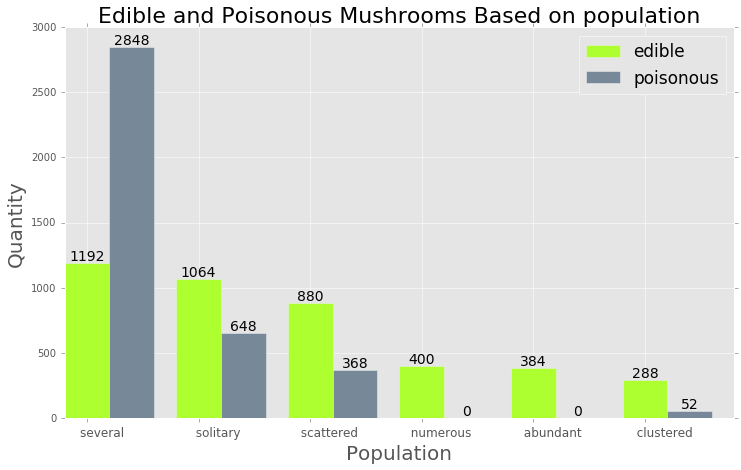

In [0]:
population = df['population'].value_counts()
population_height = population.values.tolist() #Provides numerical values
population_labels = population.axes[0].tolist() #Converts index labels object to list

ind = np.arange(len(population_labels))

poisonous_pp = [] #Poisonous odor list
edible_pp = []    #Edible odor list
for pp in population_labels:
    size = len(df[df['population'] == pp].index)
    edibles = len(df[(df['population'] == pp) & (df['class'] == 'e')].index)
    edible_pp.append(edibles)
    poisonous_pp.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_pp , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_pp , width, color='#778899')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Population",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on population',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('        several', '          solitary','          scattered','          numerous','          abundant','          clustered'),fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 14)
autolabel(poison_bars, 14) 

# Show label and each lebel quantity

In [0]:
population_labels

['v', 'y', 's', 'n', 'a', 'c']

In [0]:
print(edible_pp )
print(poisonous_pp)

[1192, 1064, 880, 400, 384, 288]
[2848, 648, 368, 0, 0, 52]


# Bar plots : Habitat แหล่งอาศัย

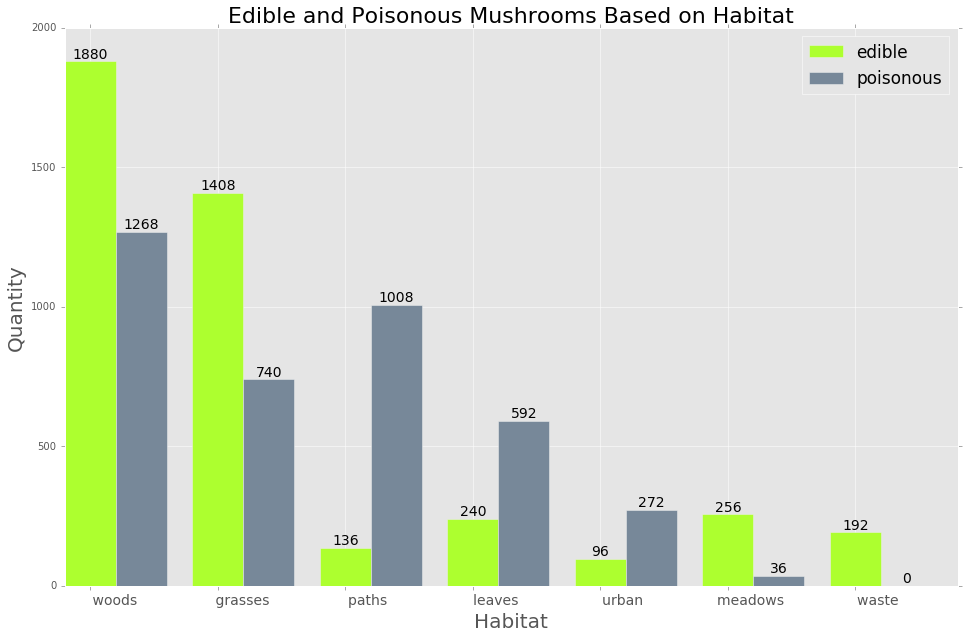

In [0]:
habitat= df['habitat'].value_counts()
height = habitat.values.tolist() #Provides numerical values
habitat.axes #Provides row labels
habitat_labels = habitat.axes[0].tolist() #Converts index object to list

ind = np.arange(len(habitat_labels))
poisonous_hb = [] #Poisonous odor list
edible_hb = []    #Edible odor list
for habitat in habitat_labels:
    size = len(df[df['habitat'] == habitat].index)
    edibles = len( df[(df['habitat'] == habitat) & ( df['class'] == 'e')].index)
    edible_hb.append(edibles)
    poisonous_hb.append(size-edibles)


width = 0.40
fig, ax = plt.subplots(figsize=(16,10))
edible_bars = ax.bar(ind, edible_hb , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_hb , width, color='#778899')

ax.set_xlabel("Habitat",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Habitat',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('           woods', '           grasses','          paths','          leaves','          urban','          meadows','          waste'), fontsize = 14)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)

autolabel(edible_bars, 14)
autolabel(poison_bars, 14)


# Show label and each lebel quantity

In [0]:
habitat_labels

['d', 'g', 'p', 'l', 'u', 'm', 'w']

In [0]:
print(edible_hb)
print(poisonous_hb)

[1880, 1408, 136, 240, 96, 256, 192]
[1268, 740, 1008, 592, 272, 36, 0]


# Bar plots : Odor กลิ่นของเห็ด

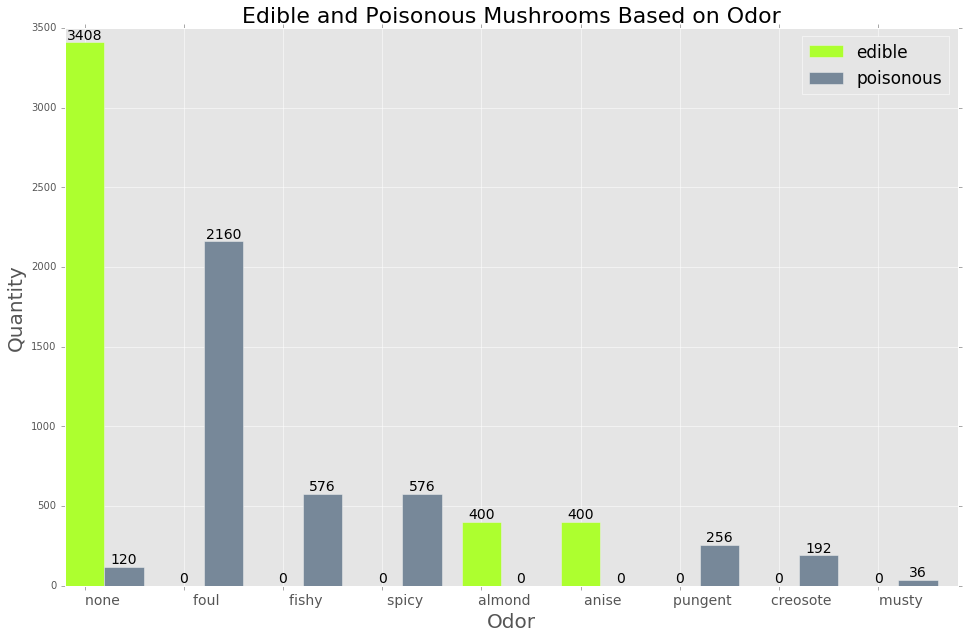

In [0]:
odors = df['odor'].value_counts()
odor_height = odors.values.tolist() #Provides numerical values
odor_labels = odors.axes[0].tolist() #Converts index labels object to list

ind = np.arange(len(odor_labels))

poisonous_od = [] #Poisonous odor list
edible_od = []    #Edible odor list
for odor in odor_labels:
    size = len(df[df['odor'] == odor].index)
    edibles = len(df[(df['odor'] == odor) & (df['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(16,10))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#778899')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('        none', '          foul','          fishy','          spicy','          almond','          anise','          pungent','          creosote','          musty'),
                  fontsize = 14)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 14)
autolabel(poison_bars, 14)

# Show label and each lebel quantity

In [0]:
odor_labels

['n', 'f', 's', 'y', 'l', 'a', 'p', 'c', 'm']

In [0]:
print(edible_od)
print(poisonous_od)

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


# ****** 1.ตัด feature stak-root ที่มี missing value , ทำ dimensional reduction ******

# (3.ทำการเติม missing value ใน feature stalk-root ด้วยการใช้ predict model , ทำ dimensional reduction)

# วิธีที่ 3 ต้อง รัน block ข้างล่าง result ของวิธีที่ 2 ก่อน

# Seperating predict and respone

In [0]:
X=df.drop('class',axis=1) 
#X=X.drop('stalk-root',axis=1) 
y=df['class'] 
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [0]:
df['stalk-root'].value_counts()

b    6149
e    1120
c     663
r     192
Name: stalk-root, dtype: int64

# One hot encoding

In [0]:
X=pd.get_dummies(X,columns=X.columns)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# split data in to train and test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# using PCA to reduce dimension

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Import confusion matrix and cross val 

In [0]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# using to show result and confusion matrix

In [0]:
testac=['LinearRegression','Support vector machine','DecisionTree','RandomForest','K-nearest neighbors ','Naive Bayes']
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        conf = confusion_matrix(y_train,classifier.predict(X_train))
        print('                 Confusion matrix')
        print()
        f, ax = plt.subplots(figsize =(5,5))
        sns.heatmap(conf,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
        plt.title("Test for Test Dataset")
        plt.xlabel("predicted y values")
        plt.ylabel("real y values")
        plt.show()
        print('                          Edible           Poison   ')
        print('Edible                %6d' % conf[0,0] + '             %5d' % conf[0,1] )
        print('Poison                %6d' % conf[1,0] + '            %5d' % conf[1,1] )
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print()
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        conf = confusion_matrix(y_test,classifier.predict(X_test))
        print('                 Confusion matrix')
        print()
        f, ax = plt.subplots(figsize =(5,5))
        sns.heatmap(conf,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
        plt.title("Test for Test Dataset")
        plt.xlabel("predicted y values")
        plt.ylabel("real y values")
        plt.show()
        print('                          Edible           Poison   ')
        print('Edible                %6d' % conf[0,0] + '             %5d' % conf[0,1] )
        print('Poison                %6d' % conf[1,0] + '            %5d' % conf[1,1] )
        testac.append(accuracy_score(y_test,classifier.predict(X_test)))

# 1st model : Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Train set result

In [0]:
#print_score(classifier,X_train,y_train,X_test,y_test,train=True)

# Test set result

Test results:

Accuracy Score: 0.8728

Classification Report:
             precision    recall  f1-score   support

          e       0.82      0.96      0.89      1257
          p       0.94      0.78      0.86      1181

avg / total       0.88      0.87      0.87      2438


                 Confusion matrix



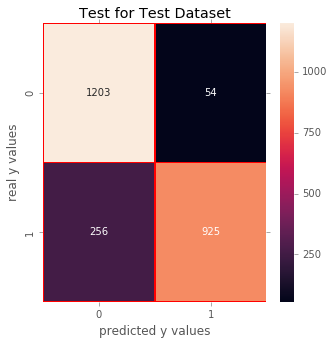

                          Edible           Poison   
Edible                  1203                54
Poison                   256              925


In [0]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

# 2nd model : Support vector machine

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

# Train set result

In [0]:
#print_score(classifier,X_train,y_train,X_test,y_test,train=True)

# Test set result

Test results:

Accuracy Score: 0.9434

Classification Report:
             precision    recall  f1-score   support

          e       0.96      0.93      0.94      1257
          p       0.93      0.96      0.94      1181

avg / total       0.94      0.94      0.94      2438


                 Confusion matrix



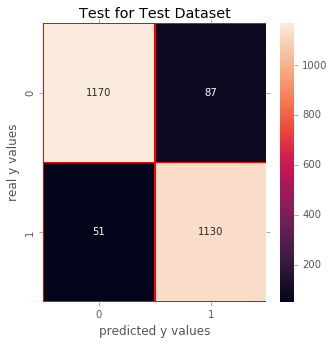

                          Edible           Poison   
Edible                  1170                87
Poison                    51             1130


In [0]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

# 3rd model : Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

# train set result

In [0]:
#print_score(classifier,X_train,y_train,X_test,y_test,train=True)

# test set result

Test results:

Accuracy Score: 0.9873

Classification Report:
             precision    recall  f1-score   support

          e       0.99      0.99      0.99      1257
          p       0.99      0.99      0.99      1181

avg / total       0.99      0.99      0.99      2438


                 Confusion matrix



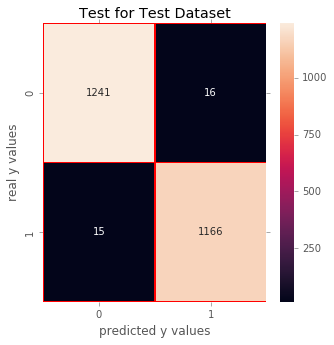

                          Edible           Poison   
Edible                  1241                16
Poison                    15             1166


In [0]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

# 4th model : Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# Train set result

In [0]:
#print_score(classifier,X_train,y_train,X_test,y_test,train=True)

# Test set result

Test results:

Accuracy Score: 0.9902

Classification Report:
             precision    recall  f1-score   support

          e       0.99      0.99      0.99      1257
          p       0.99      0.99      0.99      1181

avg / total       0.99      0.99      0.99      2438


                 Confusion matrix



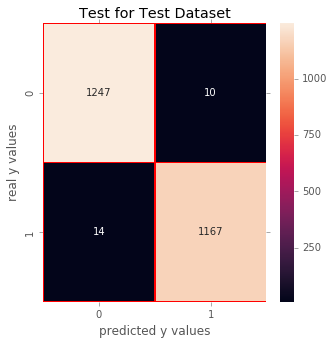

                          Edible           Poison   
Edible                  1247                10
Poison                    14             1167


In [0]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

# 5th model : K-nearest neighbors 

In [0]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

# Train set result

In [0]:
#print_score(classifier,X_train,y_train,X_test,y_test,train=True)

# Test set result

Test results:

Accuracy Score: 0.9696

Classification Report:
             precision    recall  f1-score   support

          e       0.96      0.98      0.97      1257
          p       0.98      0.96      0.97      1181

avg / total       0.97      0.97      0.97      2438


                 Confusion matrix



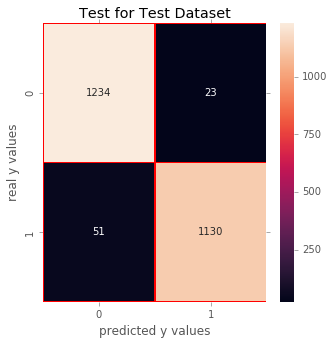

                          Edible           Poison   
Edible                  1234                23
Poison                    51             1130


In [0]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

# 6th model : Naive bayes

In [0]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None)

Test results:

Accuracy Score: 0.8811

Classification Report:
             precision    recall  f1-score   support

          e       0.83      0.97      0.89      1257
          p       0.96      0.78      0.86      1181

avg / total       0.89      0.88      0.88      2438


                 Confusion matrix



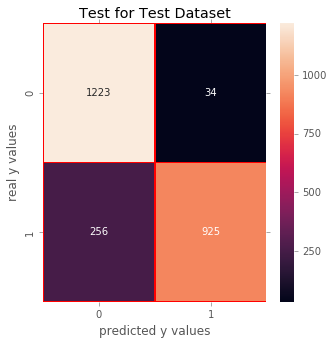

                          Edible           Poison   
Edible                  1223                34
Poison                   256              925


In [0]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

# Result สำหรับวิธี 1(3)

In [0]:
for i in range(0,len(testac)) : 
    if(i<=5):
        print('Test accuracy for '+str(testac[i])+' : '+str(testac[i+6]))    

Test accuracy for LinearRegression : 0.87284659557
Test accuracy for Support vector machine : 0.943396226415
Test accuracy for DecisionTree : 0.987284659557
Test accuracy for RandomForest : 0.990155865463
Test accuracy for K-nearest neighbors  : 0.969647251846
Test accuracy for Naive Bayes : 0.881050041017


# ****** 2.ตัด feature stak-root ที่มี missing value , ไม่ทำ dimensional reduction******


# *******(4.ทำการเติม missing value ใน feature stalk-root ด้วยการใช้ predict model , ไม่ทำ dimensional reduction)*******

# วิธีที่ 4 ต้อง รัน block ข้างล่าง result ของวิธีที่ 2 ก่อน

In [0]:
testac=['LinearRegression','Support vector machine','DecisionTree','RandomForest','K-nearest neighbors ','Naive Bayes']
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        conf = confusion_matrix(y_train,classifier.predict(X_train))
        print('                 Confusion matrix')
        print()
        f, ax = plt.subplots(figsize =(5,5))
        sns.heatmap(conf,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
        plt.title("Test for Test Dataset")
        plt.xlabel("predicted y values")
        plt.ylabel("real y values")
        plt.show()
        print('                          Edible           Poison   ')
        print('Edible                %6d' % conf[0,0] + '             %5d' % conf[0,1] )
        print('Poison                %6d' % conf[1,0] + '            %5d' % conf[1,1] )
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print()
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        conf = confusion_matrix(y_test,classifier.predict(X_test))
        print('                 Confusion matrix')
        print()
        f, ax = plt.subplots(figsize =(5,5))
        sns.heatmap(conf,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
        plt.title("Test for Test Dataset")
        plt.xlabel("predicted y values")
        plt.ylabel("real y values")
        plt.show()
        print('                          Edible           Poison   ')
        print('Edible                %6d' % conf[0,0] + '             %5d' % conf[0,1] )
        print('Poison                %6d' % conf[1,0] + '            %5d' % conf[1,1] )
        testac.append(accuracy_score(y_test,classifier.predict(X_test)))

# Seperating predict and respone

In [0]:
X=df.drop('class',axis=1) 
#X=X.drop('stalk-root',axis=1) 
y=df['class'] 
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


# ทำ one hot encoding

In [0]:
X=pd.get_dummies(X,columns=X.columns)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# split data in to train and test set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1st model : Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# test result

Test results:

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          e       1.00      1.00      1.00      1257
          p       1.00      1.00      1.00      1181

avg / total       1.00      1.00      1.00      2438


                 Confusion matrix



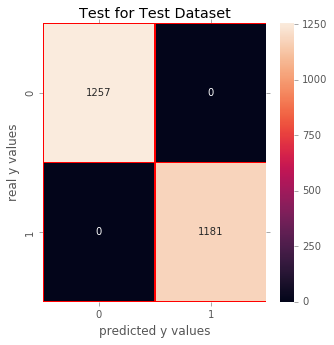

                          Edible           Poison   
Edible                  1257                 0
Poison                     0             1181


In [0]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

# 2nd model : Support vector machine

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

# Test result

Test results:

Accuracy Score: 0.9984

Classification Report:
             precision    recall  f1-score   support

          e       1.00      1.00      1.00      1257
          p       1.00      1.00      1.00      1181

avg / total       1.00      1.00      1.00      2438


                 Confusion matrix



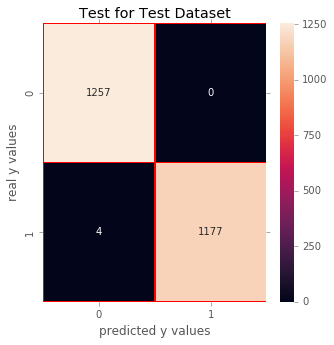

                          Edible           Poison   
Edible                  1257                 0
Poison                     4             1177


In [0]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

# 3th model : Decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

# Test result

Test results:

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          e       1.00      1.00      1.00      1257
          p       1.00      1.00      1.00      1181

avg / total       1.00      1.00      1.00      2438


                 Confusion matrix



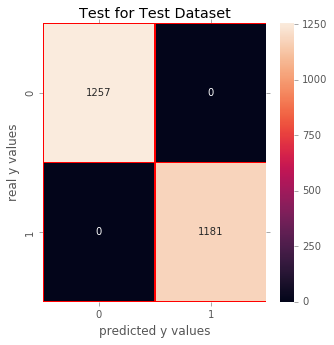

                          Edible           Poison   
Edible                  1257                 0
Poison                     0             1181


In [0]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

# 4th model : Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# Test result

Test results:

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          e       1.00      1.00      1.00      1257
          p       1.00      1.00      1.00      1181

avg / total       1.00      1.00      1.00      2438


                 Confusion matrix



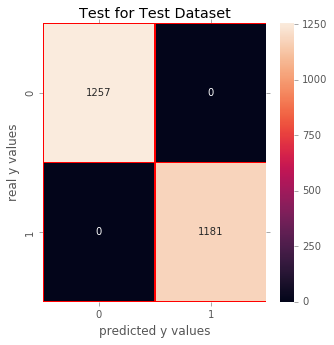

                          Edible           Poison   
Edible                  1257                 0
Poison                     0             1181


In [0]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

# 5th model : K-nearest neighbours

In [0]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

# Test result

Test results:

Accuracy Score: 0.9984

Classification Report:
             precision    recall  f1-score   support

          e       1.00      1.00      1.00      1257
          p       1.00      1.00      1.00      1181

avg / total       1.00      1.00      1.00      2438


                 Confusion matrix



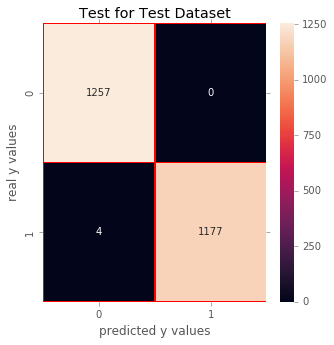

                          Edible           Poison   
Edible                  1257                 0
Poison                     4             1177


In [0]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

# 6th model : Naive bayes

In [0]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None)

# Test result

Test results:

Accuracy Score: 0.9602

Classification Report:
             precision    recall  f1-score   support

          e       1.00      0.92      0.96      1257
          p       0.92      1.00      0.96      1181

avg / total       0.96      0.96      0.96      2438


                 Confusion matrix



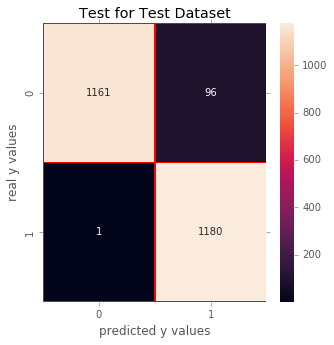

                          Edible           Poison   
Edible                  1161                96
Poison                     1             1180


In [0]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

# result สำหรับวิธีที่ 2 (4)

In [0]:
for i in range(0,len(testac)) : 
    if(i<=5):
        print('Test accuracy for '+str(testac[i])+' : '+str(testac[i+6]))    

Test accuracy for LinearRegression : 1.0
Test accuracy for Support vector machine : 0.998359310911
Test accuracy for DecisionTree : 1.0
Test accuracy for RandomForest : 1.0
Test accuracy for K-nearest neighbors  : 0.998359310911
Test accuracy for Naive Bayes : 0.960213289582


# ****************** run ส่วนนี้ก่อนแล้วแล้วไปเริ่มรันข้อ 1 ใหม่ เพื่อทำวิธีที่ 3-4 

# (ใส่ comment ในบรรทัดคำสั่ง X=X.drop('stalk-root',axis=1)  ) ********************

# ลองเติมช่องตารางข้อมูลที่เป็น missing value ด้วย predicted model

In [0]:
df = pd.read_csv(r"C:\Users\User\Desktop\mushroom\mushrooms.csv")

In [0]:
x1=df
x2=df 

In [0]:
x1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# ให้ x1 เป็น dataset ที่ไม่มี missing value ใน feature 'stalk-root'

In [0]:
i = 0
for value in x1['stalk-root']:
    if(value =='?'):
       x1=x1.drop([i])# drop row which have '?'  value
    i+=1
     

In [0]:
x1['stalk-root'].value_counts() #result

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [0]:
x1.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,...,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644
unique,2,6,4,8,2,7,2,2,2,9,...,4,7,7,1,2,3,4,6,6,6
top,e,x,y,g,t,n,f,c,b,p,...,s,w,w,p,w,o,p,n,v,d
freq,3488,2840,2220,1696,3184,2776,5626,4620,4940,1384,...,3544,3136,3088,5644,5636,5488,3488,1920,2160,2492


# ให้ x2 เป็น dataset ที่มีแต่ missing value ใน feature 'stalk-root'

In [0]:
i = 0
for value in x2['stalk-root']:
    if(value !='?'):
       x2=x2.drop([i])
    i+=1
     

In [0]:
x2['stalk-root'].value_counts()#result

?    2480
Name: stalk-root, dtype: int64

In [0]:
x2.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,2480,2480,2480,2480,2480,2480,2480,2480,2480,2480,...,2480,2480,2480,2480,2480,2480,2480,2480,2480,2480
unique,2,4,3,9,2,4,2,2,2,10,...,4,4,6,1,3,2,3,6,5,5
top,p,x,s,n,f,n,f,c,n,b,...,s,w,w,p,w,o,e,w,v,l
freq,1760,816,1296,1120,2288,752,2288,2192,1808,1728,...,1392,1328,1296,2480,2288,2000,1952,2240,1880,768


# กำหนด label ของ x1 ด้วย feature stalk-root

In [0]:
y1=x1['stalk-root']
x1=x1.drop('stalk-root',axis=1) 

# ทำ  Encoding categorical data ให้เป็น numerical data

# # **********  ตรงส่วนนี้ใช้ Label Encoding แทน one hot encoding  เนื่องจากเมื่อทำการ drop row ใน table x1,x2 แล้ว มีบาง class ใน feature ที่หายไปส่งผลให้ table x1,x2 มี column ที่ีไม่เท่ากัน (เช่น features cap_color ใน x1 มีแค่ 3 ประเภท แต่ใน x2 มี 4 ประเภท ประเภท)ทำให้ model ที่ได้จาก x1 นำมาpredict ค่า stalk-rootใน x2 ไม่ได้ **********

In [0]:
Encoder_X = LabelEncoder() 
for col in x1.columns:
    x1[col] = Encoder_X.fit_transform(x1[col])
x1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,2,...,2,5,5,0,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3
3,1,5,3,6,1,6,1,0,1,3,...,2,5,5,0,0,1,3,1,3,5
4,0,5,2,3,0,5,1,1,0,2,...,2,5,5,0,0,1,0,2,0,1


# label เฉลย ของ x1

In [0]:
y1

0       e
1       c
2       c
3       e
4       e
5       c
6       c
7       c
8       e
9       c
10      c
11      c
12      c
13      e
14      e
15      e
16      e
17      e
18      e
19      e
20      c
21      e
22      c
23      c
24      c
25      e
26      c
27      c
28      e
29      b
       ..
7704    b
7705    b
7706    c
7709    c
7714    c
7717    b
7721    b
7727    c
7739    c
7779    b
7801    c
7805    c
7820    c
7887    b
7898    b
7910    c
7919    b
7931    b
7940    b
7941    c
7946    b
7952    b
7965    b
7981    c
7984    b
7986    b
8001    b
8038    b
8095    c
8114    c
Name: stalk-root, dtype: object

In [0]:
testac=['LinearRegression','Support vector machine','DecisionTree','RandomForest','K-nearest neighbors ','Naive Bayes']
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        conf = confusion_matrix(y_train,classifier.predict(X_train))
        print('                 Confusion matrix')
        print()
        f, ax = plt.subplots(figsize =(5,5))
        sns.heatmap(conf,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
        plt.title("Test for Test Dataset")
        plt.xlabel("predicted y values")
        plt.ylabel("real y values")
        plt.show()
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        conf = confusion_matrix(y_test,classifier.predict(X_test))
        print('                 Confusion matrix')
        print()
        f, ax = plt.subplots(figsize =(5,5))
        sns.heatmap(conf,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
        plt.title("Test for Test Dataset")
        plt.xlabel("predicted y values")
        plt.ylabel("real y values")
        plt.show()
        testac.append(accuracy_score(y_test,classifier.predict(X_test)))

# split data in to train and test set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

สำหรับ confusion matrix ใน model ข้างล่าง

b = bulbous

c = club

e = equal

r = rooted

# 1st model : Logistic regression

In [0]:
classifier1 = LogisticRegression()

classifier1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Test results:

Accuracy Score: 0.9965

Classification Report:
             precision    recall  f1-score   support

          b       1.00      1.00      1.00      1087
          c       0.97      1.00      0.98       172
          e       1.00      1.00      1.00       363
          r       1.00      0.94      0.97        72

avg / total       1.00      1.00      1.00      1694


                 Confusion matrix



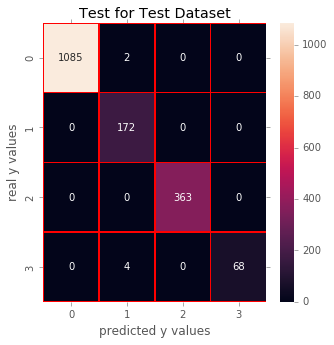

In [0]:
print_score(classifier1,X_train,y_train,X_test,y_test,train=False)

# 2nd model : Support vector machine

In [0]:
classifier2 = SVC(kernel='rbf',random_state=42)

classifier2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

Test results:

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          b       1.00      1.00      1.00      1087
          c       1.00      1.00      1.00       172
          e       1.00      1.00      1.00       363
          r       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00      1694


                 Confusion matrix



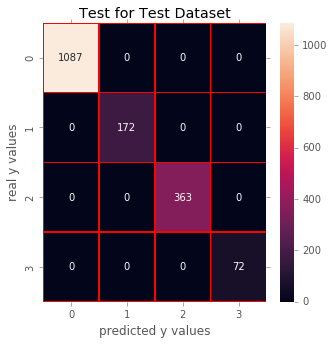

In [0]:
print_score(classifier2,X_train,y_train,X_test,y_test,train=False)

# 3rd model : Random Forest

In [0]:
classifier3 = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42)
classifier3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Test results:

Accuracy Score: 1.0000

Classification Report:
             precision    recall  f1-score   support

          b       1.00      1.00      1.00      1087
          c       1.00      1.00      1.00       172
          e       1.00      1.00      1.00       363
          r       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00      1694


                 Confusion matrix



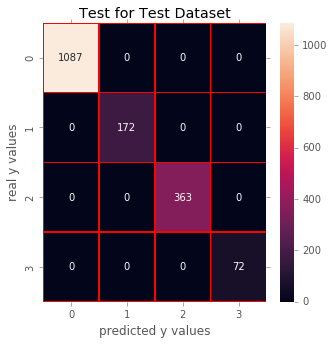

In [0]:
print_score(classifier3,X_train,y_train,X_test,y_test,train=False)

# จะเห็นว่า model ที่มี ค่า score = 1.0 (สูงที่สุด) คือ Random forest กับ Support vector machine

# จากนั้น model ที่ได้ มา predict dataset x2 

In [0]:
x2['stalk-root'].value_counts()

?    2480
Name: stalk-root, dtype: int64

In [0]:
x2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l


In [0]:
x2=x2.drop('stalk-root',axis=1) 
x2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l


# **********  ตรงส่วนใช้ Label Encoding แทน one hot encoding  เนื่องจากเมื่อทำการ drop row ใน table x1,x2 แล้ว มีบาง class ใน feature ที่หายไปส่งผลให้ table x1,x2 มี column ที่ีไม่เท่ากัน (เช่น features cap_color ใน x1 มีแค่ 3 ประเภท แต่ใน x2 มี 4 ประเภท ประเภท)ทำให้ model ที่ได้จาก x1 นำมาpredict ค่า stalk-rootใน x2 ไม่ได้ **********

In [0]:
#x2=pd.get_dummies(x2,columns=x2.columns)
Encoder_X = LabelEncoder() 
for col in x2.columns:
    x2[col] = Encoder_X.fit_transform(x2[col])
#Encoder_y=LabelEncoder()
#y = Encoder_y.fit_transform(y)
x2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,0,3,2,0,1,1,1,0,0,1,...,2,0,4,0,2,1,0,4,0,4
4023,1,3,2,1,0,3,1,0,1,0,...,2,3,4,0,2,0,0,4,3,3
4076,0,1,2,6,0,1,1,0,1,3,...,0,3,4,0,2,0,1,1,4,0
4100,1,3,2,1,0,3,1,0,1,0,...,2,2,3,0,2,0,0,4,3,0
4104,1,3,2,3,0,0,1,0,1,0,...,2,2,3,0,2,0,0,4,3,2


# Predict ค่า missing value ใน x2

In [0]:
predict_x2=classifier3.predict(x2)

In [0]:
predict_x2

array(['b', 'b', 'b', ..., 'b', 'b', 'c'], dtype=object)

In [0]:
fill_nullvalue_with_predicted_model()

# Function ที่ใช้เติม missing value ใน dataset หลัก

In [0]:
def fill_nullvalue_with_predicted_model():
    num=0 # index df
    ind_y=0 # index predict list
    for value in df['stalk-root']:
        if (value == '?'):
            df.iloc[num,11] = predict_x2[ind_y]
            ind_y+=1
        num+=1

# Result

In [0]:
df['stalk-root'].value_counts()

b    6149
e    1120
c     663
r     192
Name: stalk-root, dtype: int64

# Bar plot ของ stalk root หลังเติม missing value

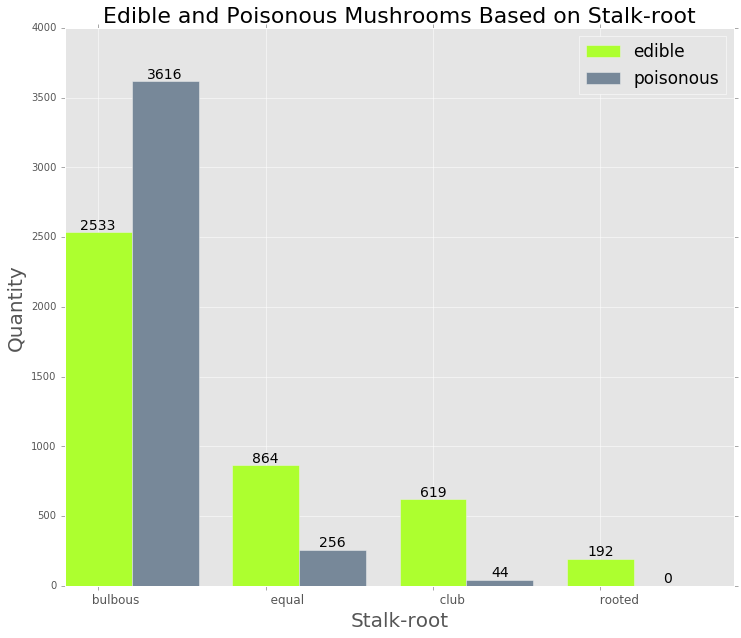

In [0]:
root = df['stalk-root'].value_counts()
root_height = root.values.tolist() #Provides numerical values
root_labels = root.axes[0].tolist() #Converts index labels object to list

ind = np.arange(len(root_labels))

poisonous_sr = [] #Poisonous odor list
edible_sr = []    #Edible odor list
for sr in root_labels:
    size = len(df[df['stalk-root'] == sr].index)
    edibles = len(df[(df['stalk-root'] == sr) & (df['class'] == 'e')].index)
    edible_sr.append(edibles)
    poisonous_sr.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,10))
edible_bars = ax.bar(ind, edible_sr , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_sr , width, color='#778899')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Stalk-root",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Stalk-root',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('         bulbous', '           equal','          club','          rooted'),fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 14)
autolabel(poison_bars, 14)

In [0]:
df['stalk-root'].value_counts()

b    6149
e    1120
c     663
r     192
Name: stalk-root, dtype: int64

# สรุป

# วิธีที่ 1 : ตัด feature stak-root ที่มี missing value , ทำ dimensional reduction

# ได้ result ของแต่ละ model ดังนี้

Test accuracy for LinearRegression : 0.880229696473

Test accuracy for Support vector machine : 0.945036915505

Test accuracy for DecisionTree : 0.986874487285

Test accuracy for RandomForest : 0.990566037736

Test accuracy for K-nearest neighbors  : 0.963904840033

Test accuracy for Naive Bayes : 0.883100902379

# วิธีที่ 2 : ตัด feature stak-root ที่มี missing value, ไม่ทำ dimensional reduction

# ได้ result ของแต่ละ model ดังนี้

Test accuracy for LinearRegression : 0.999589827728

Test accuracy for Support vector machine : 0.998769483183

Test accuracy for DecisionTree : 1.0

Test accuracy for RandomForest : 1.0

Test accuracy for K-nearest neighbors  : 0.999179655455

Test accuracy for Naive Bayes : 0.984003281378


# วิธีที่ 3 : ทำการเติม missing value ใน feature stak-root ด้วยการใช้ predict model , ทำ dimensional reduction

# ได้ result ของแต่ละ model ดังนี้

Test accuracy for LinearRegression : 0.87284659557

Test accuracy for Support vector machine : 0.943396226415

Test accuracy for DecisionTree : 0.987284659557

Test accuracy for RandomForest : 0.990155865463

Test accuracy for K-nearest neighbors  : 0.969647251846

Test accuracy for Naive Bayes : 0.881050041017

# วิธีที่ 4 : ทำการเติม missing value ใน feature stak-root ด้วยการใช้ predict model , ไม่ทำ dimensional reduction

# ได้ result ของแต่ละ model ดังนี้

Test accuracy for LinearRegression : 1.0

Test accuracy for Support vector machine : 0.998359310911

Test accuracy for DecisionTree : 1.0

Test accuracy for RandomForest : 1.0

Test accuracy for K-nearest neighbors  : 0.998359310911

Test accuracy for Naive Bayes : 0.960213289582

In [0]:
acs = pd.read_csv(r"C:\Users\User\Desktop\mushroom\Accuracy_Score.csv")

In [0]:
acs

,LinearRegression,Support vector machine,DecisionTree,RandomForest,K-nearest neighbors,Naive Bayes
0,0.880230,0.945037,0.986874,0.990566,0.963905,0.883101
1,0.999590,0.998769,1.000000,1.000000,0.999180,0.984003
2,0.872847,0.943396,0.987285,0.990156,0.969647,0.881050
3,1.000000,0.998359,1.000000,1.000000,0.998359,0.960213


ประเด็นสำคัญได้
- การทำ pca นั้ทำให้ตัว model มีประสิทธิภาพในการทำนายที่น้อยลง
- การเติมหรือไม่เติม missing value นั้นไม่สร้างผลลัพธ์ที่แตกต่างอย่างเป็นนัยสำคัญหรับตัว model
- decision tree กับ random forest เป็น อัลกอริทึมที่ทำให้ได้ model ที่ดีที่สุดสำหรับ dataset ชุดนี้